<a href="https://colab.research.google.com/github/keerthib55/Machine_Learning/blob/main/Churn_Prediction_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing Libraries

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score
sns.set_style("darkgrid")

### Loading data

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Churn_Modelling.csv')

In [ ]:
data.shape

(10000, 14)

In [ ]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


### Exploratory Data Analysis


<ipython-input-103-684ffad9fe3f>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Exited', data=data, palette="mako")


<Axes: xlabel='Exited', ylabel='count'>

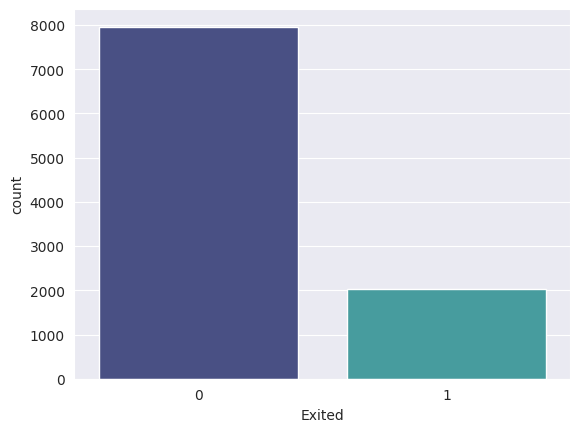

In [ ]:
sns.countplot(x='Exited', data=data, palette="mako")


<ipython-input-104-739ddfebb3c8>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Geography', data=data, palette="flare")


<Axes: xlabel='Geography', ylabel='count'>

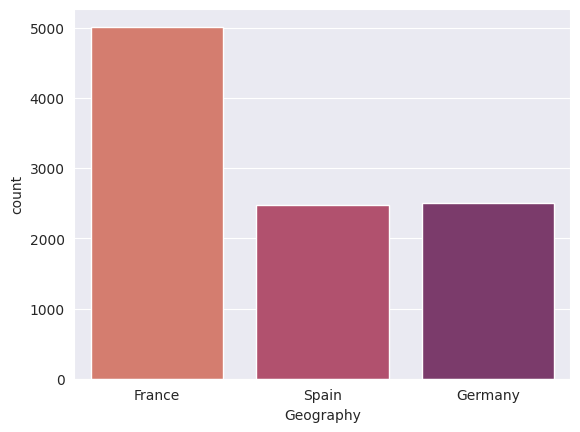

In [ ]:
sns.countplot(x='Geography', data=data, palette="flare")


<Axes: xlabel='Exited', ylabel='count'>

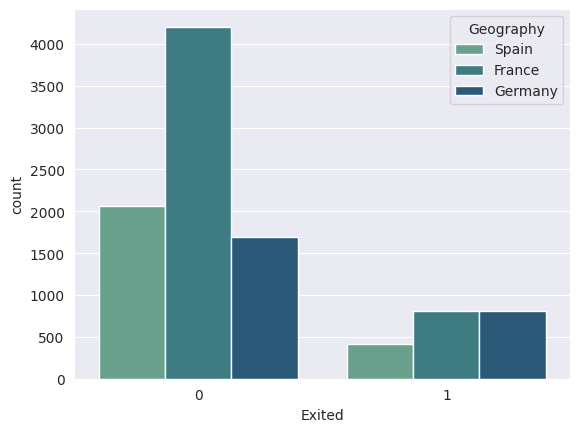

In [ ]:
sns.countplot(x='Exited', hue='Geography', data=data, palette="crest")


<Axes: xlabel='Exited', ylabel='Age'>

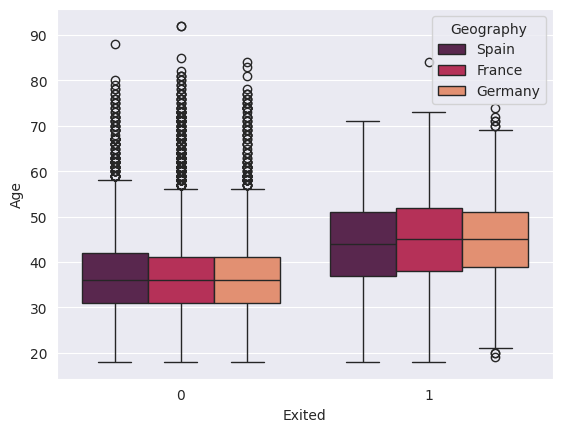

In [ ]:
sns.boxplot(x='Exited', y= "Age", hue="Geography", data=data, palette="rocket")


<Axes: xlabel='Exited', ylabel='Age'>

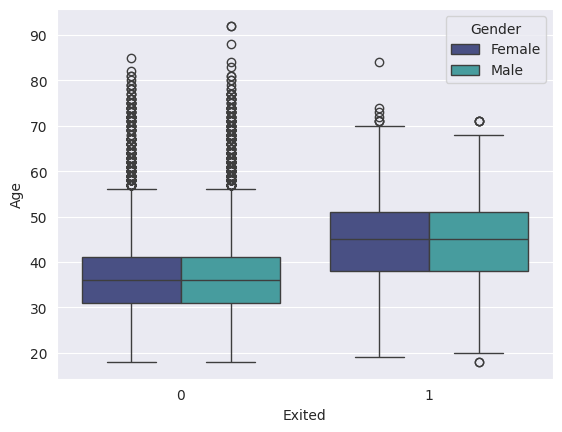

In [ ]:
sns.boxplot(x='Exited', y= "Age", hue="Gender", data=data, palette="mako")


<ipython-input-108-5c8604b72f1e>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Exited', y= "Balance", data=data, palette="tab10")


<Axes: xlabel='Exited', ylabel='Balance'>

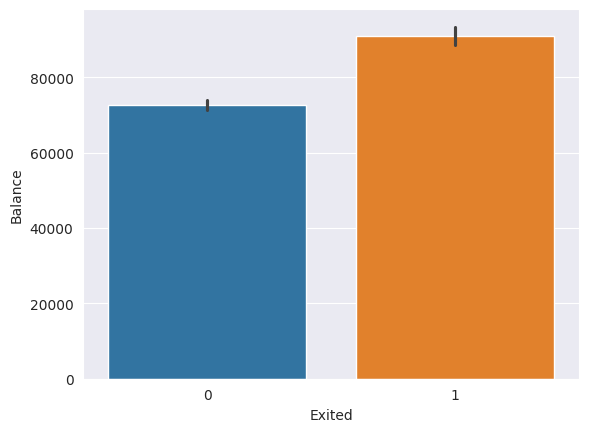

In [ ]:
sns.barplot(x='Exited', y= "Balance", data=data, palette="tab10")


<ipython-input-109-b73d4cb900e8>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Exited', y= "EstimatedSalary", data=data, palette="rocket_r")


<Axes: xlabel='Exited', ylabel='EstimatedSalary'>

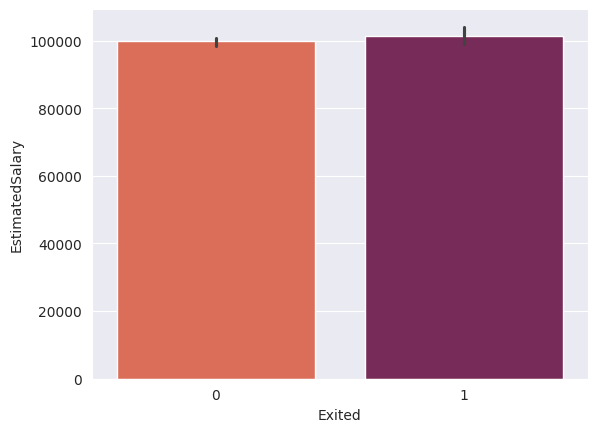

In [ ]:
sns.barplot(x='Exited', y= "EstimatedSalary", data=data, palette="rocket_r")


<Axes: xlabel='IsActiveMember', ylabel='count'>

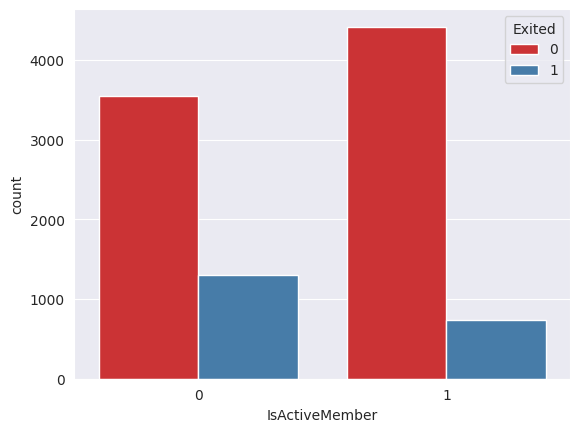

In [ ]:
sns.countplot(x='IsActiveMember', hue= "Exited", data=data, palette="Set1")


### Data Pre-processing

In [ ]:
data = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)


In [ ]:
features =  data.drop(['Exited'], axis=1)
labels = data['Exited']

In [ ]:
temp_data =  features.drop(['Geography', 'Gender'], axis=1)

Geography = pd.get_dummies(features .Geography).iloc[:,1:]
Gender = pd.get_dummies(features.Gender).iloc[:,1:]

In [ ]:
final_feature_set = pd.concat([temp_data,Geography,Gender], axis=1)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(final_feature_set, labels, test_size = 0.25, random_state = 42)

### ALGORITHM TRAINING AND TESTING


In [ ]:
from xgboost import XGBClassifier
import xgboost as xgb
from xgboost import DMatrix

In [ ]:
model = XGBClassifier(learning_rate =0.1, n_estimators=100 , random_state=42)
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [ ]:
y_pred = model.predict(X_test)


In [ ]:
print(classification_report(y_test,y_pred ))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      2003
           1       0.75      0.49      0.60       497

    accuracy                           0.87      2500
   macro avg       0.82      0.73      0.76      2500
weighted avg       0.86      0.87      0.86      2500

0.8672


### FINDING THE BEST FEATURES

<Axes: >

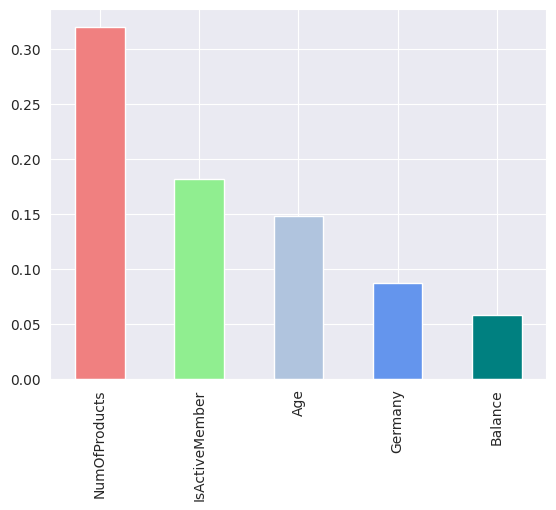

In [ ]:
import numpy as np
feat_importances = pd.Series(model.feature_importances_, index=final_feature_set.columns)
colors=['lightcoral','lightgreen','lightsteelblue','cornflowerblue','teal']
feat_importances.nlargest(5).plot(kind='bar',color=colors)
